# **Задание:**

1. Считайте датасет из файла train.csv (это данные о выживаемости на Титанике)
2. Выберите и обоснуйте метрику для измерения качества (accuracy/precision/recall/f1-score/fbeta-score/roc-auc и т.д.). В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения) - **2 балла**
3. Постройте бейзлайн и ML-модель классификации (LogisticRegression или любая другая, которая вам кажется подходящей) и оцените их качество с помощью выбранной метрики.

# **Критерии оценки:**
1. Произведено разбиение датасета на тренировочную/тестовую выборки - **1 балл**
2. Произведено измерение качества константного предсказания (например, наиболее частотный класс/случайное предсказание) - **1 балл**
3. ML-модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - **3 балла**
4. Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - **1 балл**
5. Обеспечена воспроизводимость решения: зафиксированы random_state, ноутбук воспроизводится от начала до конца без ошибок - **2 балла**

## Импортирование библиотек

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## **1. Считайте датасет из файла train.csv (это данные о выживаемости на Титанике)**

In [17]:
# Считываем датасет
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **2. Выберите и обоснуйте метрику для измерения качества**

**Плюсы и минусы разных метрик:**

### **2.1 Accuracy (точность)**
- Легко интерпретируется как процент правильных предсказаний.
- Хорошо работает, когда классы сбалансированы.
- Не учитывает несбалансированность классов, поэтому может быть вводящей в заблуждение, если классы несбалансированы.
- Не показывает, насколько хорошо модель классифицирует положительные и отрицательные классы.

### **2.2 Precision (точность положительных предсказаний)**
- Показывает, насколько хорошо модель классифицирует положительные классы.
- Полезна, когда стоимость ложноположительных предсказаний высока.
- Не учитывает несбалансированность классов.
- Не показывает, насколько хорошо модель классифицирует отрицательные классы.

### **2.3 Recall (полнота):**
- Показывает, насколько хорошо модель классифицирует положительные классы.
- Полезна, когда стоимость ложноотрицательных предсказаний высока.
- Не учитывает несбалансированность классов.
- Не показывает, насколько хорошо модель классифицирует отрицательные классы.

### **2.4 F1-score (Точность и полнота)**
- Учитывает как точность, так и полноту.
- Показывает, насколько хорошо модель классифицирует положительные и отрицательные классы.
- Не учитывает несбалансированность классов.
- Не показывает, насколько хорошо модель отличает положительные классы от отрицательных.

### **2.5 F-beta score (обобщение F1-score)**
- Позволяет задавать различные веса точности и полноты с помощью параметра beta.
- Показывает, насколько хорошо модель классифицирует положительные и отрицательные классы.
- Не учитывает несбалансированность классов.
- Не показывает, насколько хорошо модель отличает положительные классы от отрицательных.

### **2.6 ROC-AUC (площадь под кривой ROC)**
- Показывает, насколько хорошо модель отличает положительные классы от отрицательных.
- Не зависит от порога классификации.
- Не учитывает несбалансированность классов.
- Не показывает, насколько хорошо модель классифицирует положительные и отрицательные классы.

### **2.7 Дополнительные метрики:**
- **Cohen's kappa** (коэффициент Коэна) - показывает, насколько хорошо модель классифицирует объекты, исправляя случайное согласие.
- **Matthews correlation coefficient** (коэффициент корреляции Мэттьюза) - показывает, насколько хорошо модель классифицирует объекты, исправляя случайное согласие и несбалансированность классов.

### **Выбор метрик**

Из описанных метрик больше всего подойдут для данной задачи:
- **F1-score**, потому что нам важно учесть как точность, так и полноту классификации.
- Также мы посчитаем **AUC ROC**, потому что нам важно посмотреть, насколько хорошо модель отличает положительные классы от отрицательных.


# **3. Предобработка данных для модели**

## 3.1 Преобразование данных

In [18]:
# Преобразуем категориальные признаки в числовые с помощью LabelEncoder

# Столбцы, которые будем преобразовывать
categorical_features = ['Sex', 'Embarked']


label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Как видно столбцы 'Sex', 'Embarked' имеют численные значения
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


## 3.2 Выбор данных для обучения

Для начала стоит определить на каких данных из таблицы будем обучать, а какие столбцы не нужны для обучения и будут только мешать.



Не все стоит брать. Например не так важны такие столбцы как:

- **PassengerId** - ID пассажира в данной таблице
- **Name** - имя пассажира
- **Ticket** - номер билета
- **Fare** - плата за проезд
- **Cabin** - каюта
- **Embarked** - порт посадки

Эти данные на целевую переменную влияют не сильно, как например от порта посадки или имени пассажира.

Эти данные нужно из таблицы удалить.

In [25]:
df = df.drop(['PassengerId',
              'Name',
              'Ticket',
              'Fare',
              'Cabin',
              'Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


Остались численные данные, которые могут влить на целевую переменную:

- **Pclass** — класс пассажира
- **Sex** — пол
- **Age** — возраст
- **SibSp** — количество братьев, сестер, сводных братьев, сводных сестер, супругов
- **Parch** — количество родителей, детей (в том числе приемных)

## 3.3 Работа с пропусками

In [34]:
# Сколько пропусков в столбце Возраст - Age
df['Age'].isna().sum()

177

In [37]:
# Заменим пропущенные значения в столбце Age средним значением для соответствующего класса пассажиров
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

# Пропусков нет
df['Age'].isna().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [39]:
# Изменим тим данных в столбце Age, чтобы все данные были одного типа в int32.

df = df.astype('int32')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int32
 1   Pclass    891 non-null    int32
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int32
 5   Parch     891 non-null    int32
dtypes: int32(6)
memory usage: 21.0 KB


## 3.4 Корреляция данных

In [46]:
# Посмотрим как данные влияют
corrs = df.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
upper_tri

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,NaN,-0.338481,-0.543351,-0.050127,-0.035322,0.081629
Pclass,NaN,NaN,0.131900,-0.403989,0.083081,0.018443
Sex,NaN,NaN,NaN,0.079544,-0.114631,-0.245489
Age,NaN,NaN,NaN,NaN,-0.242881,-0.175085
SibSp,NaN,NaN,NaN,NaN,NaN,0.414838
Parch,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

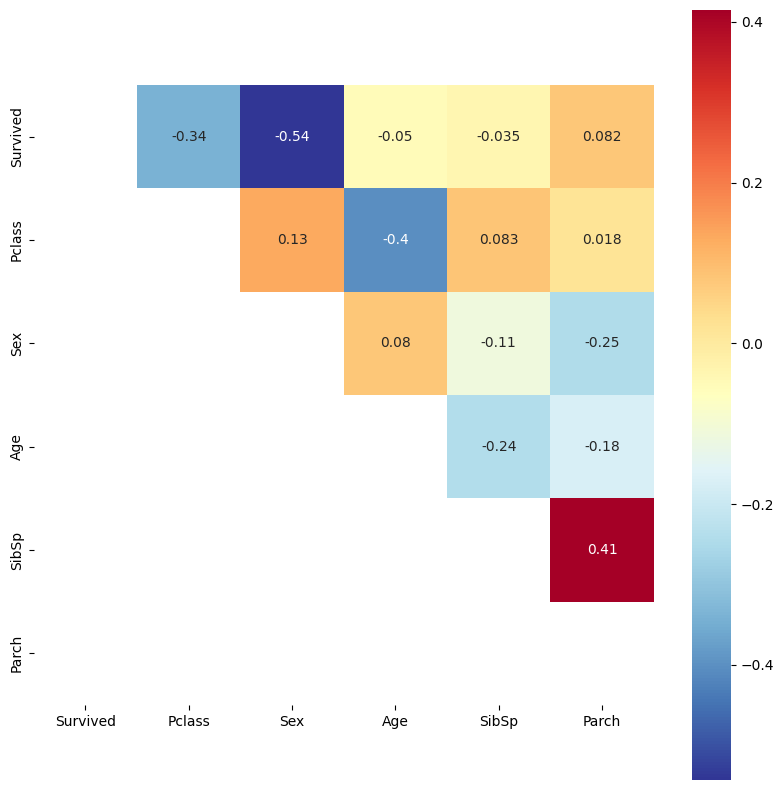

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(upper_tri, cmap='RdYlBu_r', square=True, annot=True)

Как видно на выживаемость больше всего влияют: класс пассажира, его пол.

Можно удалить столбцы, которые не сильно коррелируют с выживаемостью, но для эксперимента можно их оставить.

# **3. Разбиение датасета на тренировочную/тестовую выборки**

In [53]:
# Выделяем признаки и целевую переменную
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
print(X)

In [54]:
# Делим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 5)
(712,)
(179, 5)
(179,)


# **4. Измерение качества константного предсказания**

In [55]:
# Вычисляем наиболее частотный класс
most_frequent_class = y.value_counts().idxmax()
print(most_frequent_class)

0


In [56]:
# Создаем константный предсказатель, который всегда предсказывает наиболее частотный класс
y_pred_const = [most_frequent_class] * len(y)
print(y_pred_const)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
print(y.shape)
print(len(y_pred_const))

(891,)
891


In [67]:
# Вычисляем точность константного предсказателя
accuracy_const = accuracy_score(y, y_pred_const)
print('Точность константного предсказателя:', accuracy_const)

Точность константного предсказателя: 0.6161616161616161


# **5. Baseline и ML-модель классификации**

In [61]:
# Обучим бейзлайн на тренировочной выборке
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [60]:
# Обучим ML-модель на тренировочной выборке
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

# 6. Оценка их качество с помощью выбранных метрик

## Baseline

In [65]:
# Для бейзлайн предикт на тестовой выборки
y_pred_dummy = dummy.predict(X_test)

# Предсказывает всегда нулевой класс, как самый частотный
print(y_pred_dummy)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [71]:
# Метрика accuracy для сравнения с константным предсказанием
accuracy_dummy = accuracy_score(y, y_pred_const)

print('Точность константного предсказателя:', accuracy_const)
print('Точность baseline предсказателя:', accuracy_const)


Точность константного предсказателя: 0.6161616161616161
Точность baseline предсказателя: 0.6161616161616161


In [72]:
# Значения выбранных метрик для baseline
f1_dummy = f1_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_dummy)
print(f'F1 score: {f1_dummy:.3f}')
print(f'AUC ROC: {roc_auc_dummy:.3f}')

F1 score: 0.000
AUC ROC: 0.500


## LogisticRegression

In [73]:
# Для логистической регрессии предикт на тестовой выборки
y_pred_lr = lr.predict(X_test)

# Значения выбранных метрик
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f'F1 score: {f1_lr:.3f}')
print(f'AUC ROC: {roc_auc_lr:.3f}')

F1 score: 0.786
AUC ROC: 0.819


# **Вывод:**

- Точность константного предсказателя:  **0.616**
- Accuracy_score baseline:      **0.616**
- F1 score для baseline:                **0.000**
- AUC ROC для baseline:                 **0.500**
- F1 score для логистической регрессии: **0.786**
- AUC ROC для логистической регрессии:  **0.819**